## Decision Tree

http://scikit-learn.org/stable/modules/tree.html#classification

#### Following:

http://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/

Useful:

https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

## Load Iris data set

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris.feature_names)
X = iris.data

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target_names)
y = iris.target

['setosa' 'versicolor' 'virginica']


## Train Model

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [60]:
# split train:test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [69]:
# all data
t1 = tree.DecisionTreeClassifier(max_depth=3)
t1.fit(X_train,y_train)
pred1 = t1.predict(X_test)

## Evaluate model

In [71]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [72]:
metrics.accuracy_score(y_test, pred1)

0.9555555555555556

In [73]:
pd.DataFrame(metrics.confusion_matrix(y_test, pred1),
             columns=['Pr_'+x for x in iris.target_names],
             index=['Ac_'+x for x in iris.target_names])

,Pr_setosa,Pr_versicolor,Pr_virginica
Ac_setosa,14,0,0
Ac_versicolor,0,17,1
Ac_virginica,0,1,12


### Plot tree

In [74]:
from sklearn.tree import export_graphviz
import graphviz

In [75]:
#https://github.com/scikit-learn/scikit-learn/issues/6261
export_graphviz(t1, out_file="mytree.dot",
                feature_names=list(iris.feature_names),
                class_names=list(iris.target_names))

# convert file to png
!dot -Tpng mytree.dot -o mytree.png

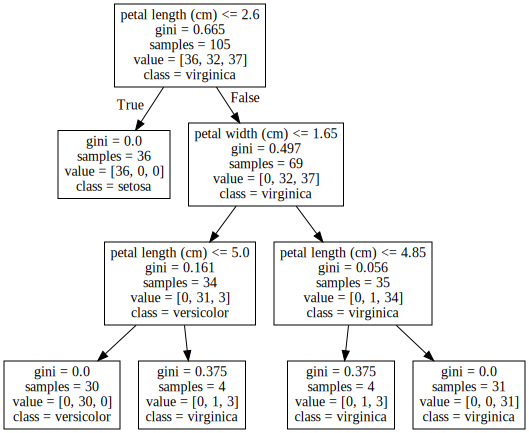

In [76]:
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [50]:
# Node 0 is the tree's root. 
# NOTE: Some of the arrays only apply to either leaves or split nodes,
# resp. In this case the values of nodes of the other type are arbitrary!
#
## Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node

n_nodes = t1.tree_.node_count
children_left = t1.tree_.children_left
children_right = t1.tree_.children_right
feature = t1.tree_.feature
threshold = t1.tree_.threshold

In [78]:
#https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined
t1.feature_importances_

array([ 0.        ,  0.        ,  0.59762619,  0.40237381])